In [ ]:
#pip install xlrd

In [149]:
import pandas as pd
import datetime 
import math
import numpy as np
import matplotlib.pyplot as plt


import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set() #sns.reset_orig()
%matplotlib inline

c_path = 'Coefs.csv'
c_df = pd.read_csv(c_path) 

p_path = 'Palmares.csv'
p_df = pd.read_csv(p_path, infer_datetime_format=True).fillna(0)   




p_df['UCL']= p_df['UCL'].astype(int)
p_df['WC']= p_df['WC'].astype(int)
p_df['EC']= p_df['EC'].astype(int)
p_df['AFC']= p_df['AFC'].astype(int)
p_df['SAC']= p_df['SAC'].astype(int)
p_df['ASC']= p_df['ASC'].astype(int)

p_df['Score']= 1.5 * (c_df.loc[0,'UCL'] * p_df['UCL'] + c_df.loc[0,'WC'] * p_df['WC'] + c_df.loc[0,'EC'] * p_df['EC'] + c_df.loc[0,'SAC'] * p_df['SAC'] + c_df.loc[0,'AFC'] * p_df['AFC']  )
p_df = p_df[p_df['Score'] > 0]


p_df['BDC']  = pd.to_datetime(p_df['BD'],infer_datetime_format=True)  - datetime.datetime.now() 
p_df ['Age'] = (-p_df['BDC'].dt.days /365)



## Teams Ranking

de = p_df.groupby('Club').agg({"Score":'sum',"Age":'mean' }).sort_values (by='Score', ascending=True).reset_index().sort_values(["Score", "Age"], ascending = (False, True))

#de['Order'] = de['Score'].rank(ascending=False,method='first').astype(int)
pd.options.display.float_format = '{:,.1f}'.format

de['Mean Age'] = de['Age'].apply(lambda x: round(x, 2))

de = de [['Club','Score','Mean Age']]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
 #print(de.to_string(index=False))

de.index = np.arange(1, len(de)+1)
#de


dee = de.head(10).iloc[::-1]
#dee.set_index('Club', inplace=True)
dee

,Club,Score,Mean Age
10,ATM,34.5,29.4
9,OL,39.8,29.6
8,JUV,42.0,29.7
7,MU,99.0,32.3
6,BYM,126.0,29.1
5,LIV,129.0,29.1
4,FCB,138.0,32.0
3,CHE,156.8,28.0
2,PSG,162.8,29.7
1,RM,484.5,28.3


In [150]:
# Vizualization

dee.index = np.arange(1, len(dee)+1)

dee['Pie'] = 100*dee['Score']/ dee['Score']. sum(axis=0)

dee = dee [['Club','Score','Pie','Mean Age']]

dee

,Club,Score,Pie,Mean Age
1,ATM,34.5,2.4,29.4
2,OL,39.8,2.8,29.6
3,JUV,42.0,3.0,29.7
4,MU,99.0,7.0,32.3
5,BYM,126.0,8.9,29.1
6,LIV,129.0,9.1,29.1
7,FCB,138.0,9.8,32.0
8,CHE,156.8,11.1,28.0
9,PSG,162.8,11.5,29.7
10,RM,484.5,34.3,28.3


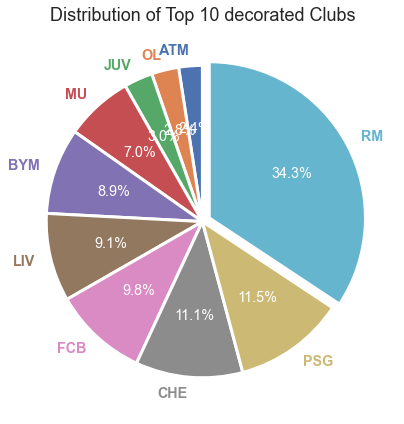

In [188]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = dee['Club']

sizes = dee['Pie']
explode = (0,0,0,0,0,0,0,0,0,0.05)  

fig1, ax1 = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, startangle=90)

# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)

ax1.set_title('Distribution of Top 10 decorated Clubs', fontsize=18)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()


filename = 'Clubs_Score_Distribution'

plt.savefig(c_df.loc[0,'Model']+'_'+filename+'.png', facecolor=(.94, .94, .94))

#plt.show()
    